In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel("../../Data/Model_Data_Rev1.xlsx")
df.dropna(inplace=True, how='any')
df.head()

Using TensorFlow backend.


,Date,Active_Rig_Count,Offshore_Rig_Supply,Offshore_Rig_Active,Offshore_Utilization_Rate,Land_Rig_Active_Count,Crude_Price_2010_USD,Adjusted_Nat_Gas_Price_2010,World_Oil_Cunsump,World_Oil_Production
130,1985-11-01,3550,656.13,560.67,85.45,2989.33,61.65,4.721732,4992.770925,4929.677119
131,1985-12-01,3618,655.52,557.97,85.12,3060.03,54.23,4.540844,5149.646289,4929.677119
132,1986-01-01,3495,658.23,541.16,82.22,2953.84,45.53,4.524317,5149.646289,5127.913140
133,1986-02-01,3123,656.32,512.18,78.04,2610.82,30.70,4.492806,5149.646289,5127.913140
134,1986-03-01,2681,655.81,467.77,71.33,2213.23,25.22,4.317624,5149.646289,5127.913140


In [31]:
train=df[df['Date']<'2018-01-01']
test=df[df['Date']<'2018-01-01']

In [3]:
train.columns

Index(['Date', 'Active_Rig_Count', 'Offshore_Rig_Supply',
       'Offshore_Rig_Active', 'Offshore_Utilization_Rate',
       'Land_Rig_Active_Count', 'Crude_Price_2010_USD',
       'Adjusted_Nat_Gas_Price_2010', 'World_Oil_Cunsump',
       'World_Oil_Production'],
      dtype='object')

In [45]:
def future(feature, look_back, model_name):
    def create_dataset(data, look_back=1):
        dataX, dataY = [], []
        for i in range(len(data)-look_back-1):
            a = data[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(data[i + look_back, 0])
        return np.array(dataX), np.array(dataY)
    data = np.reshape(feature.values, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    X, y = create_dataset(data, look_back)
    # reshape input to be [samples, time steps, features]
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, look_back)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    model.fit(X, y, epochs=1000, batch_size=5, verbose=2)
    model.save(f"{model_name}")
    
    # make prediction
    val = data[-look_back:] # last batch in the training data
    predictions = []

    # forecast the next 200 data points
    for _ in range(386):
        pred = model.predict(val.reshape(1,1,look_back))
        predictions = np.append(predictions,pred)
        val = np.append(np.delete(val, 0), pred) # update the data batch to be fed in the next iteration
        predictions = predictions.reshape(predictions.shape[0],1)

    # reverse forecasted results to its original scale
    predictions = scaler.inverse_transform(predictions)
    
    prediction_list=[pre[0] for pre in predictions.tolist()]
    return prediction_list

In [42]:
rig_count = future(train["Active_Rig_Count"], 300, "active_rig_count.h5")

Epoch 1/1000
 - 0s - loss: 0.1463 - mean_squared_error: 0.1463
Epoch 2/1000
 - 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 3/1000
 - 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 4/1000
 - 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 5/1000
 - 0s - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 6/1000
 - 0s - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 7/1000
 - 0s - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 8/1000
 - 0s - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 9/1000
 - 0s - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 10/1000
 - 0s - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 11/1000
 - 0s - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 12/1000
 - 0s - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 13/1000
 - 0s - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 14/1000
 - 0s - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 15/1000
 - 0s - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 16/1000
 - 0s - loss: 0.0017 - mean_squared

Epoch 119/1000
 - 0s - loss: 3.4871e-04 - mean_squared_error: 3.4871e-04
Epoch 120/1000
 - 0s - loss: 3.7889e-04 - mean_squared_error: 3.7889e-04
Epoch 121/1000
 - 0s - loss: 3.2042e-04 - mean_squared_error: 3.2042e-04
Epoch 122/1000
 - 0s - loss: 2.8844e-04 - mean_squared_error: 2.8844e-04
Epoch 123/1000
 - 0s - loss: 2.5566e-04 - mean_squared_error: 2.5566e-04
Epoch 124/1000
 - 0s - loss: 1.3652e-04 - mean_squared_error: 1.3652e-04
Epoch 125/1000
 - 0s - loss: 1.7393e-04 - mean_squared_error: 1.7393e-04
Epoch 126/1000
 - 0s - loss: 3.0590e-04 - mean_squared_error: 3.0590e-04
Epoch 127/1000
 - 0s - loss: 1.8179e-04 - mean_squared_error: 1.8179e-04
Epoch 128/1000
 - 0s - loss: 4.7872e-04 - mean_squared_error: 4.7872e-04
Epoch 129/1000
 - 0s - loss: 2.3077e-04 - mean_squared_error: 2.3077e-04
Epoch 130/1000
 - 0s - loss: 2.0733e-04 - mean_squared_error: 2.0733e-04
Epoch 131/1000
 - 0s - loss: 4.6433e-04 - mean_squared_error: 4.6433e-04
Epoch 132/1000
 - 0s - loss: 2.7583e-04 - mean_squa

Epoch 232/1000
 - 0s - loss: 3.1272e-04 - mean_squared_error: 3.1272e-04
Epoch 233/1000
 - 0s - loss: 2.1143e-04 - mean_squared_error: 2.1143e-04
Epoch 234/1000
 - 0s - loss: 3.2397e-04 - mean_squared_error: 3.2397e-04
Epoch 235/1000
 - 0s - loss: 1.6863e-04 - mean_squared_error: 1.6863e-04
Epoch 236/1000
 - 0s - loss: 1.6051e-04 - mean_squared_error: 1.6051e-04
Epoch 237/1000
 - 0s - loss: 1.4495e-04 - mean_squared_error: 1.4495e-04
Epoch 238/1000
 - 0s - loss: 8.8439e-05 - mean_squared_error: 8.8439e-05
Epoch 239/1000
 - 0s - loss: 8.4869e-05 - mean_squared_error: 8.4869e-05
Epoch 240/1000
 - 0s - loss: 8.2650e-05 - mean_squared_error: 8.2650e-05
Epoch 241/1000
 - 0s - loss: 1.0392e-04 - mean_squared_error: 1.0392e-04
Epoch 242/1000
 - 0s - loss: 6.4750e-05 - mean_squared_error: 6.4750e-05
Epoch 243/1000
 - 0s - loss: 2.0910e-04 - mean_squared_error: 2.0910e-04
Epoch 244/1000
 - 0s - loss: 1.3212e-04 - mean_squared_error: 1.3212e-04
Epoch 245/1000
 - 0s - loss: 9.9237e-05 - mean_squa

Epoch 345/1000
 - 0s - loss: 1.0021e-04 - mean_squared_error: 1.0021e-04
Epoch 346/1000
 - 0s - loss: 1.7960e-04 - mean_squared_error: 1.7960e-04
Epoch 347/1000
 - 0s - loss: 1.5168e-04 - mean_squared_error: 1.5168e-04
Epoch 348/1000
 - 0s - loss: 1.8782e-04 - mean_squared_error: 1.8782e-04
Epoch 349/1000
 - 0s - loss: 1.5369e-04 - mean_squared_error: 1.5369e-04
Epoch 350/1000
 - 0s - loss: 2.5120e-04 - mean_squared_error: 2.5120e-04
Epoch 351/1000
 - 0s - loss: 1.4037e-04 - mean_squared_error: 1.4037e-04
Epoch 352/1000
 - 0s - loss: 2.2911e-04 - mean_squared_error: 2.2911e-04
Epoch 353/1000
 - 0s - loss: 1.6004e-04 - mean_squared_error: 1.6004e-04
Epoch 354/1000
 - 0s - loss: 1.0471e-04 - mean_squared_error: 1.0471e-04
Epoch 355/1000
 - 0s - loss: 1.5143e-04 - mean_squared_error: 1.5143e-04
Epoch 356/1000
 - 0s - loss: 1.4007e-04 - mean_squared_error: 1.4007e-04
Epoch 357/1000
 - 0s - loss: 1.0688e-04 - mean_squared_error: 1.0688e-04
Epoch 358/1000
 - 0s - loss: 6.1262e-05 - mean_squa

Epoch 458/1000
 - 0s - loss: 5.2453e-05 - mean_squared_error: 5.2453e-05
Epoch 459/1000
 - 0s - loss: 7.5202e-05 - mean_squared_error: 7.5202e-05
Epoch 460/1000
 - 0s - loss: 1.4887e-04 - mean_squared_error: 1.4887e-04
Epoch 461/1000
 - 0s - loss: 6.9426e-05 - mean_squared_error: 6.9426e-05
Epoch 462/1000
 - 0s - loss: 6.2960e-05 - mean_squared_error: 6.2960e-05
Epoch 463/1000
 - 0s - loss: 2.4089e-04 - mean_squared_error: 2.4089e-04
Epoch 464/1000
 - 0s - loss: 1.5774e-04 - mean_squared_error: 1.5774e-04
Epoch 465/1000
 - 0s - loss: 1.7836e-04 - mean_squared_error: 1.7836e-04
Epoch 466/1000
 - 0s - loss: 1.2027e-04 - mean_squared_error: 1.2027e-04
Epoch 467/1000
 - 0s - loss: 9.9116e-05 - mean_squared_error: 9.9116e-05
Epoch 468/1000
 - 0s - loss: 5.5408e-05 - mean_squared_error: 5.5408e-05
Epoch 469/1000
 - 0s - loss: 8.2546e-05 - mean_squared_error: 8.2546e-05
Epoch 470/1000
 - 0s - loss: 8.2485e-05 - mean_squared_error: 8.2485e-05
Epoch 471/1000
 - 0s - loss: 1.0582e-04 - mean_squa

Epoch 571/1000
 - 0s - loss: 1.7786e-04 - mean_squared_error: 1.7786e-04
Epoch 572/1000
 - 0s - loss: 6.4285e-05 - mean_squared_error: 6.4285e-05
Epoch 573/1000
 - 0s - loss: 4.4161e-05 - mean_squared_error: 4.4161e-05
Epoch 574/1000
 - 0s - loss: 5.6168e-05 - mean_squared_error: 5.6168e-05
Epoch 575/1000
 - 0s - loss: 8.0032e-05 - mean_squared_error: 8.0032e-05
Epoch 576/1000
 - 0s - loss: 3.0968e-05 - mean_squared_error: 3.0968e-05
Epoch 577/1000
 - 0s - loss: 5.4202e-05 - mean_squared_error: 5.4202e-05
Epoch 578/1000
 - 0s - loss: 9.2616e-05 - mean_squared_error: 9.2616e-05
Epoch 579/1000
 - 0s - loss: 6.7221e-05 - mean_squared_error: 6.7221e-05
Epoch 580/1000
 - 0s - loss: 1.3502e-04 - mean_squared_error: 1.3502e-04
Epoch 581/1000
 - 0s - loss: 1.0305e-04 - mean_squared_error: 1.0305e-04
Epoch 582/1000
 - 0s - loss: 8.1508e-05 - mean_squared_error: 8.1508e-05
Epoch 583/1000
 - 0s - loss: 1.5009e-04 - mean_squared_error: 1.5009e-04
Epoch 584/1000
 - 0s - loss: 5.0190e-05 - mean_squa

Epoch 684/1000
 - 0s - loss: 3.8475e-05 - mean_squared_error: 3.8475e-05
Epoch 685/1000
 - 0s - loss: 2.5340e-04 - mean_squared_error: 2.5340e-04
Epoch 686/1000
 - 0s - loss: 1.8816e-04 - mean_squared_error: 1.8816e-04
Epoch 687/1000
 - 0s - loss: 1.7008e-04 - mean_squared_error: 1.7008e-04
Epoch 688/1000
 - 0s - loss: 1.3588e-04 - mean_squared_error: 1.3588e-04
Epoch 689/1000
 - 0s - loss: 7.8743e-04 - mean_squared_error: 7.8743e-04
Epoch 690/1000
 - 0s - loss: 4.0436e-04 - mean_squared_error: 4.0436e-04
Epoch 691/1000
 - 0s - loss: 1.6197e-04 - mean_squared_error: 1.6197e-04
Epoch 692/1000
 - 0s - loss: 2.4432e-04 - mean_squared_error: 2.4432e-04
Epoch 693/1000
 - 0s - loss: 8.1757e-05 - mean_squared_error: 8.1757e-05
Epoch 694/1000
 - 0s - loss: 1.0962e-04 - mean_squared_error: 1.0962e-04
Epoch 695/1000
 - 0s - loss: 7.7863e-05 - mean_squared_error: 7.7863e-05
Epoch 696/1000
 - 0s - loss: 1.1536e-04 - mean_squared_error: 1.1536e-04
Epoch 697/1000
 - 0s - loss: 3.4902e-05 - mean_squa

Epoch 797/1000
 - 0s - loss: 4.9820e-05 - mean_squared_error: 4.9820e-05
Epoch 798/1000
 - 0s - loss: 3.2091e-05 - mean_squared_error: 3.2091e-05
Epoch 799/1000
 - 0s - loss: 1.4612e-04 - mean_squared_error: 1.4612e-04
Epoch 800/1000
 - 0s - loss: 6.7961e-05 - mean_squared_error: 6.7961e-05
Epoch 801/1000
 - 0s - loss: 6.6543e-05 - mean_squared_error: 6.6543e-05
Epoch 802/1000
 - 0s - loss: 1.5646e-04 - mean_squared_error: 1.5646e-04
Epoch 803/1000
 - 0s - loss: 1.0402e-04 - mean_squared_error: 1.0402e-04
Epoch 804/1000
 - 0s - loss: 5.0406e-05 - mean_squared_error: 5.0406e-05
Epoch 805/1000
 - 0s - loss: 3.8825e-05 - mean_squared_error: 3.8825e-05
Epoch 806/1000
 - 0s - loss: 4.4156e-05 - mean_squared_error: 4.4156e-05
Epoch 807/1000
 - 0s - loss: 4.6735e-05 - mean_squared_error: 4.6735e-05
Epoch 808/1000
 - 0s - loss: 9.5494e-05 - mean_squared_error: 9.5494e-05
Epoch 809/1000
 - 0s - loss: 9.1943e-05 - mean_squared_error: 9.1943e-05
Epoch 810/1000
 - 0s - loss: 4.7574e-05 - mean_squa

Epoch 910/1000
 - 0s - loss: 4.6085e-05 - mean_squared_error: 4.6085e-05
Epoch 911/1000
 - 0s - loss: 6.1063e-05 - mean_squared_error: 6.1063e-05
Epoch 912/1000
 - 0s - loss: 3.9203e-05 - mean_squared_error: 3.9203e-05
Epoch 913/1000
 - 0s - loss: 4.3656e-05 - mean_squared_error: 4.3656e-05
Epoch 914/1000
 - 0s - loss: 6.6624e-05 - mean_squared_error: 6.6624e-05
Epoch 915/1000
 - 0s - loss: 6.1238e-05 - mean_squared_error: 6.1238e-05
Epoch 916/1000
 - 0s - loss: 3.4236e-05 - mean_squared_error: 3.4236e-05
Epoch 917/1000
 - 0s - loss: 2.6450e-05 - mean_squared_error: 2.6450e-05
Epoch 918/1000
 - 0s - loss: 2.0738e-05 - mean_squared_error: 2.0738e-05
Epoch 919/1000
 - 0s - loss: 3.1643e-05 - mean_squared_error: 3.1643e-05
Epoch 920/1000
 - 0s - loss: 1.0646e-04 - mean_squared_error: 1.0646e-04
Epoch 921/1000
 - 0s - loss: 7.5896e-05 - mean_squared_error: 7.5896e-05
Epoch 922/1000
 - 0s - loss: 3.3037e-05 - mean_squared_error: 3.3037e-05
Epoch 923/1000
 - 0s - loss: 1.1077e-04 - mean_squa

In [ ]:
#data_len = len(data)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],p_list,label="predicted data")

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],test["Active_Rig_Count"],label="actual data")
plt.legend()
plt.show()

In [46]:
rig_supply = future(train["Offshore_Rig_Supply"], 350, "rig_supply.h5")

Epoch 1/1000
 - 0s - loss: 0.2096 - mean_squared_error: 0.2096
Epoch 2/1000
 - 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 3/1000
 - 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 4/1000
 - 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 5/1000
 - 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 6/1000
 - 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 7/1000
 - 0s - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 8/1000
 - 0s - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 9/1000
 - 0s - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 10/1000
 - 0s - loss: 9.0612e-04 - mean_squared_error: 9.0612e-04
Epoch 11/1000
 - 0s - loss: 7.7894e-04 - mean_squared_error: 7.7894e-04
Epoch 12/1000
 - 0s - loss: 4.6675e-04 - mean_squared_error: 4.6675e-04
Epoch 13/1000
 - 0s - loss: 3.9814e-04 - mean_squared_error: 3.9814e-04
Epoch 14/1000
 - 0s - loss: 2.6604e-04 - mean_squared_error: 2.6604e-04
Epoch 15/1000
 - 0s - loss: 2.0048e-04 - mean_squared_error: 2.0048e-04
E

Epoch 116/1000
 - 0s - loss: 1.1323e-04 - mean_squared_error: 1.1323e-04
Epoch 117/1000
 - 0s - loss: 1.2186e-04 - mean_squared_error: 1.2186e-04
Epoch 118/1000
 - 0s - loss: 1.3179e-04 - mean_squared_error: 1.3179e-04
Epoch 119/1000
 - 0s - loss: 1.3320e-04 - mean_squared_error: 1.3320e-04
Epoch 120/1000
 - 0s - loss: 1.5048e-04 - mean_squared_error: 1.5048e-04
Epoch 121/1000
 - 0s - loss: 1.5211e-04 - mean_squared_error: 1.5211e-04
Epoch 122/1000
 - 0s - loss: 1.4831e-04 - mean_squared_error: 1.4831e-04
Epoch 123/1000
 - 0s - loss: 1.3285e-04 - mean_squared_error: 1.3285e-04
Epoch 124/1000
 - 0s - loss: 9.8877e-05 - mean_squared_error: 9.8877e-05
Epoch 125/1000
 - 0s - loss: 1.0656e-04 - mean_squared_error: 1.0656e-04
Epoch 126/1000
 - 0s - loss: 1.0027e-04 - mean_squared_error: 1.0027e-04
Epoch 127/1000
 - 0s - loss: 1.0922e-04 - mean_squared_error: 1.0922e-04
Epoch 128/1000
 - 0s - loss: 1.1330e-04 - mean_squared_error: 1.1330e-04
Epoch 129/1000
 - 0s - loss: 1.1844e-04 - mean_squa

Epoch 229/1000
 - 0s - loss: 9.0522e-05 - mean_squared_error: 9.0522e-05
Epoch 230/1000
 - 0s - loss: 1.5946e-04 - mean_squared_error: 1.5946e-04
Epoch 231/1000
 - 0s - loss: 1.3461e-04 - mean_squared_error: 1.3461e-04
Epoch 232/1000
 - 0s - loss: 1.5099e-04 - mean_squared_error: 1.5099e-04
Epoch 233/1000
 - 0s - loss: 1.4596e-04 - mean_squared_error: 1.4596e-04
Epoch 234/1000
 - 0s - loss: 1.7750e-04 - mean_squared_error: 1.7750e-04
Epoch 235/1000
 - 0s - loss: 2.1010e-04 - mean_squared_error: 2.1010e-04
Epoch 236/1000
 - 0s - loss: 1.3154e-04 - mean_squared_error: 1.3154e-04
Epoch 237/1000
 - 0s - loss: 1.6786e-04 - mean_squared_error: 1.6786e-04
Epoch 238/1000
 - 0s - loss: 2.6944e-04 - mean_squared_error: 2.6944e-04
Epoch 239/1000
 - 0s - loss: 1.9008e-04 - mean_squared_error: 1.9008e-04
Epoch 240/1000
 - 0s - loss: 1.5761e-04 - mean_squared_error: 1.5761e-04
Epoch 241/1000
 - 0s - loss: 9.0413e-05 - mean_squared_error: 9.0413e-05
Epoch 242/1000
 - 0s - loss: 8.5423e-05 - mean_squa

Epoch 342/1000
 - 0s - loss: 8.4496e-05 - mean_squared_error: 8.4496e-05
Epoch 343/1000
 - 0s - loss: 8.9291e-05 - mean_squared_error: 8.9291e-05
Epoch 344/1000
 - 0s - loss: 8.4824e-05 - mean_squared_error: 8.4824e-05
Epoch 345/1000
 - 0s - loss: 7.1327e-05 - mean_squared_error: 7.1327e-05
Epoch 346/1000
 - 0s - loss: 5.9537e-05 - mean_squared_error: 5.9537e-05
Epoch 347/1000
 - 0s - loss: 1.1386e-04 - mean_squared_error: 1.1386e-04
Epoch 348/1000
 - 0s - loss: 9.5779e-05 - mean_squared_error: 9.5779e-05
Epoch 349/1000
 - 0s - loss: 8.9151e-05 - mean_squared_error: 8.9151e-05
Epoch 350/1000
 - 0s - loss: 1.1299e-04 - mean_squared_error: 1.1299e-04
Epoch 351/1000
 - 0s - loss: 9.9873e-05 - mean_squared_error: 9.9873e-05
Epoch 352/1000
 - 0s - loss: 7.3859e-05 - mean_squared_error: 7.3859e-05
Epoch 353/1000
 - 0s - loss: 7.6476e-05 - mean_squared_error: 7.6476e-05
Epoch 354/1000
 - 0s - loss: 1.1349e-04 - mean_squared_error: 1.1349e-04
Epoch 355/1000
 - 0s - loss: 2.2156e-04 - mean_squa

Epoch 455/1000
 - 0s - loss: 1.0707e-04 - mean_squared_error: 1.0707e-04
Epoch 456/1000
 - 0s - loss: 1.0920e-04 - mean_squared_error: 1.0920e-04
Epoch 457/1000
 - 0s - loss: 7.9957e-05 - mean_squared_error: 7.9957e-05
Epoch 458/1000
 - 0s - loss: 1.0286e-04 - mean_squared_error: 1.0286e-04
Epoch 459/1000
 - 0s - loss: 6.6288e-05 - mean_squared_error: 6.6288e-05
Epoch 460/1000
 - 0s - loss: 6.8919e-05 - mean_squared_error: 6.8919e-05
Epoch 461/1000
 - 0s - loss: 4.9394e-05 - mean_squared_error: 4.9394e-05
Epoch 462/1000
 - 0s - loss: 9.4483e-05 - mean_squared_error: 9.4483e-05
Epoch 463/1000
 - 0s - loss: 4.1233e-05 - mean_squared_error: 4.1233e-05
Epoch 464/1000
 - 0s - loss: 4.3346e-05 - mean_squared_error: 4.3346e-05
Epoch 465/1000
 - 0s - loss: 6.3554e-05 - mean_squared_error: 6.3554e-05
Epoch 466/1000
 - 0s - loss: 1.0803e-04 - mean_squared_error: 1.0803e-04
Epoch 467/1000
 - 0s - loss: 5.8451e-05 - mean_squared_error: 5.8451e-05
Epoch 468/1000
 - 0s - loss: 5.6683e-05 - mean_squa

Epoch 568/1000
 - 0s - loss: 7.4907e-05 - mean_squared_error: 7.4907e-05
Epoch 569/1000
 - 0s - loss: 1.1155e-04 - mean_squared_error: 1.1155e-04
Epoch 570/1000
 - 0s - loss: 6.4754e-05 - mean_squared_error: 6.4754e-05
Epoch 571/1000
 - 0s - loss: 7.6000e-05 - mean_squared_error: 7.6000e-05
Epoch 572/1000
 - 0s - loss: 9.7054e-05 - mean_squared_error: 9.7054e-05
Epoch 573/1000
 - 0s - loss: 9.2291e-05 - mean_squared_error: 9.2291e-05
Epoch 574/1000
 - 0s - loss: 4.9929e-05 - mean_squared_error: 4.9929e-05
Epoch 575/1000
 - 0s - loss: 4.4658e-05 - mean_squared_error: 4.4658e-05
Epoch 576/1000
 - 0s - loss: 3.6884e-05 - mean_squared_error: 3.6884e-05
Epoch 577/1000
 - 0s - loss: 3.3546e-05 - mean_squared_error: 3.3546e-05
Epoch 578/1000
 - 0s - loss: 5.0142e-05 - mean_squared_error: 5.0142e-05
Epoch 579/1000
 - 0s - loss: 1.1155e-04 - mean_squared_error: 1.1155e-04
Epoch 580/1000
 - 0s - loss: 7.6716e-05 - mean_squared_error: 7.6716e-05
Epoch 581/1000
 - 0s - loss: 8.9255e-05 - mean_squa

Epoch 681/1000
 - 0s - loss: 2.3044e-05 - mean_squared_error: 2.3044e-05
Epoch 682/1000
 - 0s - loss: 6.3545e-05 - mean_squared_error: 6.3545e-05
Epoch 683/1000
 - 0s - loss: 2.8525e-05 - mean_squared_error: 2.8525e-05
Epoch 684/1000
 - 0s - loss: 3.4086e-05 - mean_squared_error: 3.4086e-05
Epoch 685/1000
 - 0s - loss: 3.1162e-05 - mean_squared_error: 3.1162e-05
Epoch 686/1000
 - 0s - loss: 3.3946e-05 - mean_squared_error: 3.3946e-05
Epoch 687/1000
 - 0s - loss: 3.8953e-05 - mean_squared_error: 3.8953e-05
Epoch 688/1000
 - 0s - loss: 5.5576e-05 - mean_squared_error: 5.5576e-05
Epoch 689/1000
 - 0s - loss: 2.1520e-05 - mean_squared_error: 2.1520e-05
Epoch 690/1000
 - 0s - loss: 5.8856e-05 - mean_squared_error: 5.8856e-05
Epoch 691/1000
 - 0s - loss: 7.0465e-05 - mean_squared_error: 7.0465e-05
Epoch 692/1000
 - 0s - loss: 2.2323e-05 - mean_squared_error: 2.2323e-05
Epoch 693/1000
 - 0s - loss: 2.8964e-05 - mean_squared_error: 2.8964e-05
Epoch 694/1000
 - 0s - loss: 3.6958e-05 - mean_squa

Epoch 794/1000
 - 0s - loss: 4.1957e-05 - mean_squared_error: 4.1957e-05
Epoch 795/1000
 - 0s - loss: 2.6418e-05 - mean_squared_error: 2.6418e-05
Epoch 796/1000
 - 0s - loss: 3.4970e-05 - mean_squared_error: 3.4970e-05
Epoch 797/1000
 - 0s - loss: 2.0640e-05 - mean_squared_error: 2.0640e-05
Epoch 798/1000
 - 0s - loss: 6.0775e-05 - mean_squared_error: 6.0775e-05
Epoch 799/1000
 - 0s - loss: 3.4508e-05 - mean_squared_error: 3.4508e-05
Epoch 800/1000
 - 0s - loss: 4.3465e-05 - mean_squared_error: 4.3465e-05
Epoch 801/1000
 - 0s - loss: 6.4184e-05 - mean_squared_error: 6.4184e-05
Epoch 802/1000
 - 0s - loss: 2.0296e-05 - mean_squared_error: 2.0296e-05
Epoch 803/1000
 - 0s - loss: 2.4793e-05 - mean_squared_error: 2.4793e-05
Epoch 804/1000
 - 0s - loss: 4.0681e-05 - mean_squared_error: 4.0681e-05
Epoch 805/1000
 - 0s - loss: 2.4231e-05 - mean_squared_error: 2.4231e-05
Epoch 806/1000
 - 0s - loss: 4.5547e-05 - mean_squared_error: 4.5547e-05
Epoch 807/1000
 - 0s - loss: 5.2268e-05 - mean_squa

Epoch 907/1000
 - 0s - loss: 2.8170e-05 - mean_squared_error: 2.8170e-05
Epoch 908/1000
 - 0s - loss: 2.5861e-05 - mean_squared_error: 2.5861e-05
Epoch 909/1000
 - 0s - loss: 2.5669e-05 - mean_squared_error: 2.5669e-05
Epoch 910/1000
 - 0s - loss: 1.8180e-05 - mean_squared_error: 1.8180e-05
Epoch 911/1000
 - 0s - loss: 5.2411e-05 - mean_squared_error: 5.2411e-05
Epoch 912/1000
 - 0s - loss: 3.7916e-05 - mean_squared_error: 3.7916e-05
Epoch 913/1000
 - 0s - loss: 1.8936e-05 - mean_squared_error: 1.8936e-05
Epoch 914/1000
 - 0s - loss: 3.0228e-05 - mean_squared_error: 3.0228e-05
Epoch 915/1000
 - 0s - loss: 3.3433e-05 - mean_squared_error: 3.3433e-05
Epoch 916/1000
 - 0s - loss: 1.9962e-05 - mean_squared_error: 1.9962e-05
Epoch 917/1000
 - 0s - loss: 2.2973e-05 - mean_squared_error: 2.2973e-05
Epoch 918/1000
 - 0s - loss: 2.7813e-05 - mean_squared_error: 2.7813e-05
Epoch 919/1000
 - 0s - loss: 5.4097e-05 - mean_squared_error: 5.4097e-05
Epoch 920/1000
 - 0s - loss: 5.2699e-05 - mean_squa

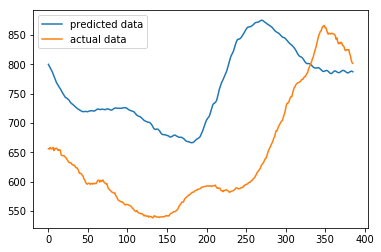

In [47]:
#data_len = len(data)
plt.plot(np.arange(386),rig_supply,label="predicted data")

plt.plot(np.arange(386),test["Offshore_Rig_Supply"],label="actual data")
plt.legend()
plt.show()

In [ ]:
comparison=pd.DataFrame({'Actual':test["Offshore_Rig_Supply"].values.tolist(),"prediction":rig_supply})

In [ ]:
comparison['err']=comparison['Actual']-comparison['prediction']

In [ ]:
comparison

In [ ]:
land_active = future(train["Land_Rig_Active_Count"], 200, "land_active.h5")

In [ ]:
#data_len = len(data)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],rig_supply,label="predicted data")

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],test["Land_Rig_Active_Count"],label="actual data")
plt.legend()
plt.show()